In [2]:
import numpy as np
from matplotlib import pyplot as plt

## Simple nudging algorithm for Lorenz63

## Set Up

Get a "true" x using Euler Maruyama in order to have a conditionally-gaussian system

In [3]:
def EM(x0, T = 100, timesteps = 100000, c = 1e-6):
    delta_t = T/timesteps
    rho = 28
    beta = 8/3
    sigma = 10
    final = np.zeros((timesteps,3))
    final[0] = x0
    for i in range(timesteps-1):
        final[i+1, 0] = final[i,0] + delta_t*(sigma*(final[i,1]-final[i,0]))
        final[i+1, 1] = final[i,1] + delta_t*(final[i,0]*(rho - final[i,2])-final[i,1]) + c*np.random.normal(0,np.sqrt(delta_t))
        final[i+1, 2] = final[i,2] + delta_t*(final[i,0]*final[i,1]-beta*final[i,2])

    return final


In [4]:

rho = 28
beta = 8/3
sigma = 10
T = 100
n = 100000
dt = T/n

sol = EM([0,1,0], timesteps=n)
x = sol[:,0]
x_vals = x.copy()

In [5]:
u = np.zeros((3,n))

u0 = np.array([x_vals[0],1,0])
u[:,0] = u0


K = np.array([10,0,0])
H = np.array([1,0,0])


for i in range(1, n): 
    x,y,z = u[:,i-1]
    F = np.array([-sigma*x+sigma*y,
                  x*(rho-z)-y,
                   x*y -beta*z ])
    u[:,i] = u[:,i-1] + dt*(F + K*(x_vals[i-1] - H@u[:,i-1]))



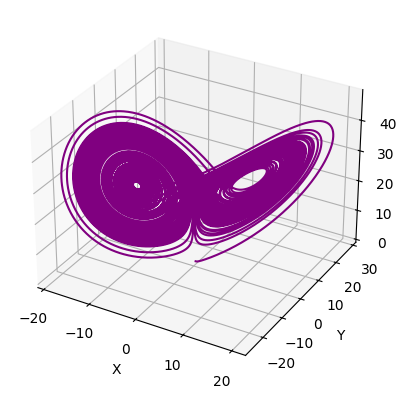

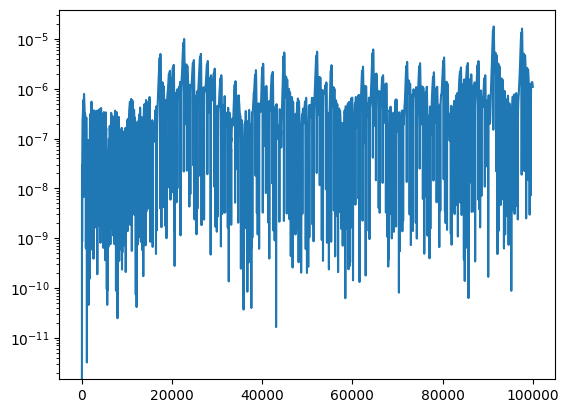

In [6]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(u[0],u[1],u[2], 'purple')
ax.set_xlabel('X')
ax.set_zlabel('Z')
plt.ylabel('Y')
plt.show()

plt.semilogy(np.abs(x_vals-u[0]))

## Same experiment, add noise to observations

In [121]:
def EM(x0, T = 100, timesteps = 10000, c = 1e-2):
    delta_t = T/(timesteps-1)
    rho = 28
    beta = 8/3
    sigma = 10
    final = np.zeros((timesteps,3))
    final[0] = x0
    for i in range(timesteps-1):
        final[i+1, 0] = final[i,0] + delta_t*(sigma*(final[i,1]-final[i,0]))
        final[i+1, 1] = final[i,1] + delta_t*(final[i,0]*(rho - final[i,2])-final[i,1]) + c*np.random.normal(0,np.sqrt(delta_t))
        final[i+1, 2] = final[i,2] + delta_t*(final[i,0]*final[i,1]-beta*final[i,2])

    return final



rho = 28
beta = 8/3
sigma = 10
T = 100
n = 100000
dt = T/(n-1)
t = np.linspace(0,T,n)
sol = EM([0,1,0], T=T,timesteps=n)
true = sol[:,0]

# add noise to obs
x_vals = true.copy() + 2*np.random.randn(len(true))

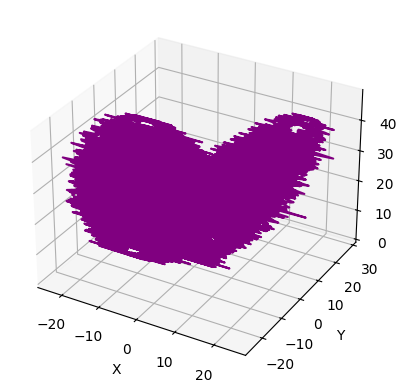

In [122]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(x_vals,sol[:,1],sol[:,2], 'purple')
ax.set_xlabel('X')
ax.set_zlabel('Z')
plt.ylabel('Y')
plt.show()


### Perform nudging

In [123]:
u = np.zeros((3,n))

# u0 = np.array([x_vals[0],1,0])
u0 = np.random.randn(3)
u[:,0] = u0


K = np.array([10,0,0])
H = np.array([1,0,0])


for i in range(1, n): 
    x,y,z = u[:,i-1]
    F = np.array([-sigma*x+sigma*y,
                  x*(rho-z)-y,
                   x*y -beta*z ])
    u[:,i] = u[:,i-1] + dt*(F + K*(x_vals[i-1] - H@u[:,i-1]))

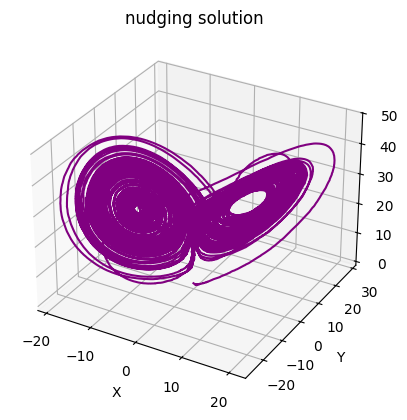

In [124]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(u[0],u[1],u[2], 'purple')
ax.set_xlabel('X')
ax.set_zlabel('Z')
plt.ylabel('Y')
plt.title("nudging solution")
plt.show()


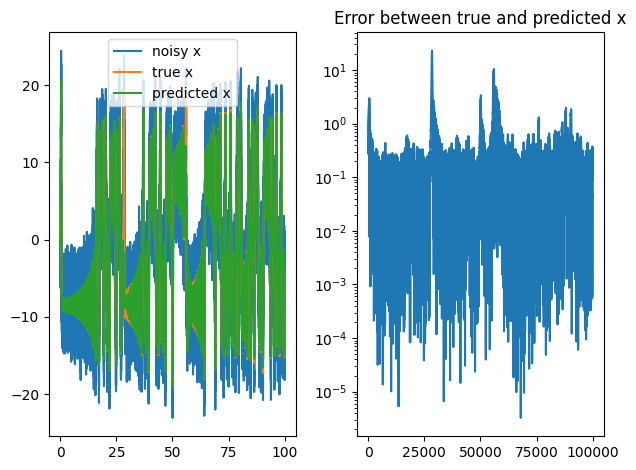

In [125]:
plt.subplot(121)
plt.plot(t,x_vals, label = 'noisy x')
plt.plot(t,true, label = 'true x')
plt.plot(t,u[0], label = 'predicted x')
plt.legend()
plt.subplot(122)
plt.semilogy(np.abs(true-u[0]))
plt.title("Error between true and predicted x")
plt.tight_layout()
plt.show()

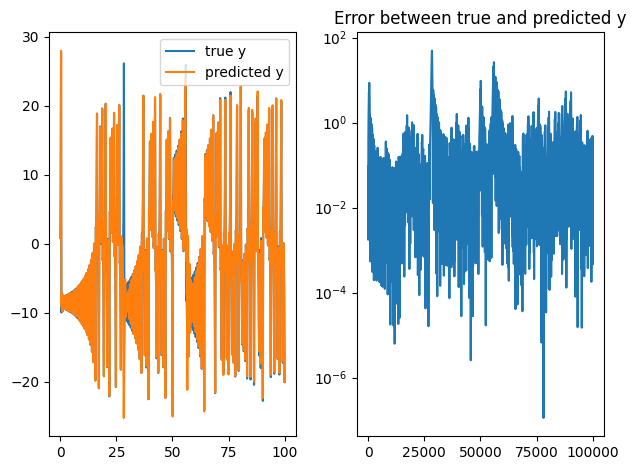

In [126]:
plt.subplot(121)
plt.plot(t,sol[:,1], label = 'true y')
plt.plot(t,u[1], label = 'predicted y')
plt.legend()
plt.subplot(122)
plt.semilogy(np.abs(sol[:,1]-u[1]))
plt.title("Error between true and predicted y")
plt.tight_layout()
plt.show()

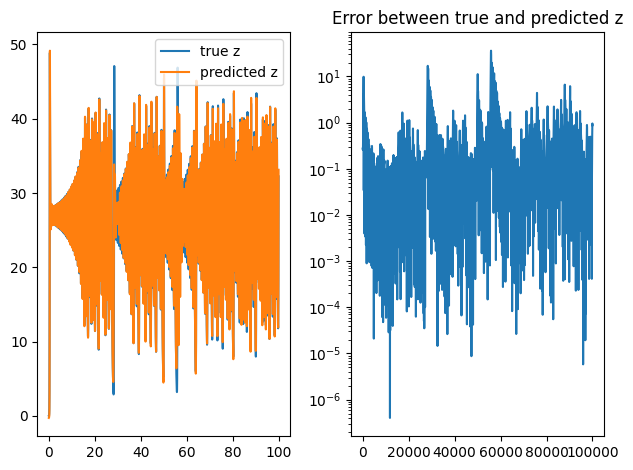

In [127]:
plt.subplot(121)
plt.plot(t,sol[:,2], label = 'true z')
plt.plot(t,u[2], label = 'predicted z')
plt.legend()
plt.subplot(122)
plt.semilogy(np.abs(sol[:,2]-u[2]))
plt.title("Error between true and predicted z")
plt.tight_layout()
plt.show()